May refer to this to develop LSTM

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

Data Split​

1. Twitter (80% Train, 20% Test)​

2. Reddit (80% Train, 20% Test)​

3. Twitter (100% Train) & Reddit (100% Test)​

4. Reddit (100% Train) & Twitter (100% Test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
twitter = pd.read_csv('twitter_cleaned_stemmed-2.csv', index_col=False)
reddit = pd.read_csv('reddit_cleaned_stemmed.csv', index_col=False)

In [ ]:
reddit.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'text', 'class'], dtype='object')

In [ ]:
reddit.drop({'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)

In [ ]:
le = LabelEncoder()
reddit['class'] = le.fit_transform(reddit['class'])

In [ ]:
twitter.columns

Index(['Unnamed: 0', 'Tweet', 'Suicide'], dtype='object')

In [ ]:
twitter.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [ ]:
twitter.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [ ]:
twitter

,text,class
0,make lunch,0
1,alexia want money,0
2,dizzyhrvi crap took forev put togeth iam go go...,1
3,jnaylor kiwitweet hey jer sinc start twitter,0
4,tri quot delici librari quot mix result bar co...,0
...,...,...
10901,ever laid bed night cri good enough count flaw...,1
10902,fault blame pain still alon insid broken home ...,1
10903,stop ask trust still cough water last time let...,1
10904,never know handl sad cri make feel stupid,1


In [ ]:
reddit.dropna(how='any', inplace=True)
twitter.dropna(how='any', inplace=True)

In [ ]:
reddit.shape

(231972, 2)

In [ ]:
X_twitter = twitter['text']
y_twitter = twitter['class']

X_reddit = reddit['text']
y_reddit = reddit['class']

In [ ]:
bow = TfidfVectorizer(ngram_range=(1, 1), min_df=1, max_df=20000, stop_words='english')
X_reddit_transformed = bow.fit_transform(X_reddit)
X_twitter_transformed = bow.fit_transform(X_twitter)

In [ ]:
unigram_vect = CountVectorizer(ngram_range=(1, 1), min_df=1, max_df=10000)

X_twitter_cv_transformed = unigram_vect.fit_transform(X_twitter)
X_reddit_cv_transformed = unigram_vect.fit_transform(X_reddit)

In [ ]:
X_trainreddit80_tfidf, X_testreddit80_tfidf, y_trainreddit80_tfidf, y_testreddit80_tfidf = train_test_split(X_reddit_transformed, y_reddit, test_size=0.2, random_state=42)
X_traintwitter80_tfidf, X_testtwitter80_tfidf, y_traintwitter80_tfidf, y_testtwitter80_tfidf = train_test_split(X_twitter_transformed, y_twitter, test_size=0.2, random_state=42)

In [ ]:
X_trainreddit80_cv, X_testreddit80_cv, y_trainreddit80_cv, y_testreddit80_cv = train_test_split(X_reddit_cv_transformed, y_reddit, test_size=0.2, random_state=42)
X_traintwitter80_cv, X_testtwitter80_cv, y_traintwitter80_cv, y_testtwitter80_cv = train_test_split(X_twitter_cv_transformed, y_twitter, test_size=0.2, random_state=42)

In [ ]:

sampler = SMOTEENN()
X_train_twitter_tfdidf_smote, y_train_twitter_tfidf_smote = sampler.fit_resample(X_traintwitter80_tfidf, y_traintwitter80_tfidf)
X_train_twitter_cv_smote, y_train_twitter_cv_smote = sampler.fit_resample(X_traintwitter80_cv, y_traintwitter80_cv)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_twitter_cv_smote = tfidf_transformer.fit_transform(X_train_twitter_cv_smote)

Dimensionality Reduction

In [ ]:

lsa = TruncatedSVD(n_components=100)
X_trainreddit80_tfidf_lsa = lsa.fit_transform(X_trainreddit80_tfidf)
X_testreddit80_tfidf_lsa = lsa.transform(X_testreddit80_tfidf)

In [ ]:
X_trainreddit80_cv_lsa = lsa.fit_transform(X_trainreddit80_cv)
X_testreddit80_cv_lsa = lsa.transform(X_testreddit80_cv)

In [ ]:
X_train_twitter_tfidf_smote_lsa = lsa.fit_transform(X_train_twitter_tfdidf_smote)
X_test_twitter80_tfidf = lsa.transform(X_testtwitter80_tfidf)
X_train_twitter_cv_smote_lsa = lsa.fit_transform(X_train_twitter_cv_smote)
X_test_twitter80_cv = lsa.transform(X_testtwitter80_cv)

In [ ]:
from imblearn.combine import SMOTEENN
sampler = SMOTEENN()
X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote = sampler.fit_resample(X_trainreddit80_tfidf_lsa, y_trainreddit80_tfidf)

In [ ]:
X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote = sampler.fit_resample(X_trainreddit80_cv_lsa, y_trainreddit80_cv)

GRU
1. Reddit80-Twitter20-TFIDF
2. Reddit80-Twitter20-CV

Refer to this for your training

First GRU for Reddit80-Twitter20-TFIDF
- X_train: X_trainreddit80_tfidf_lsa
- y_train: y_trainreddit80_tfidf
- X_test: X_test_twitter80_tfidf
- y_test: y_testtwitter80_tfidf

Second GRU for Reddit80-Twitter20-CV
- X_train: X_trainreddit80_cv_lsa
- y_train: y_trainreddit80_cv
- X_test: X_test_twitter80_cv
- y_test: y_testtwitter80_cv


In [ ]:
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 256
X_train_grureddit80tfidf = pad_sequences(X_trainreddit80_tfidf_lsa_smotee, maxlen=MAX_SEQUENCE_LENGTH)
X_train_grureddit80cv = pad_sequences(X_trainreddit80_cv_lsa_smote, maxlen=MAX_SEQUENCE_LENGTH)


In [ ]:
X_test_grureddit80tfidf = pad_sequences(X_test_twitter80_tfidf, maxlen=MAX_SEQUENCE_LENGTH)
X_test_grureddit80cv = pad_sequences(X_test_twitter80_cv, maxlen=MAX_SEQUENCE_LENGTH)

Third GRU for Twitter80-Reddit20-TFIDF
- X_train: X_train_twitter_tfidf_smote_lsa
- y_train: y_train_twitter_tfidf_smote
- X_test: X_testreddit80_tfidf_lsa
- y_test: y_testreddit80_tfidf

Forth GRU for Twitter80Reddit20CountVectorizer
- X_train: X_train_twitter_cv_smote_lsa
- y_train: y_train_twitter_cv_smote
- X_test: X_testreddit80_cv_lsa
- y_test: y_testreddit80_cv

In [ ]:
X_train_grutwitter80tfidf = pad_sequences(X_train_twitter_tfidf_smote_lsa, maxlen=MAX_SEQUENCE_LENGTH )
X_train_grutwitter80cv = pad_sequences(X_train_twitter_cv_smote_lsa, maxlen=MAX_SEQUENCE_LENGTH)


In [ ]:
X_test_grutwitter80tfidf = pad_sequences(X_testreddit80_tfidf_lsa, maxlen=MAX_SEQUENCE_LENGTH)
X_test_grutwitter80cv = pad_sequences(X_testreddit80_cv_lsa, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
inputdim_grutwitter80tfidf = print(len(X_train_grutwitter80tfidf))

5141


In [ ]:
inputdim_grureddit80tfidf = print(len(X_train_grureddit80tfidf))

100662


In [ ]:
output_dim = 100
input_length= 256

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout


In [ ]:


model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=len(X_train_grureddit80tfidf), output_dim=100, input_length=256, name='layer_embedding'))
model_GRU.add(GRU(16, return_sequences=True))
model_GRU.add(GRU(8, return_sequences=True))
model_GRU.add(GRU(4, return_sequences=True))
model_GRU.add(GRU(2))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding  (None, 256, 100)          10062700  
 )                                                               
                                                                 
 gru (GRU)                   (None, 256, 16)           5664      
                                                                 
 gru_1 (GRU)                 (None, 256, 8)            624       
                                                                 
 gru_2 (GRU)                 (None, 256, 4)            168       
                                                                 
 gru_3 (GRU)                 (None, 2)                 48        
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                        

In [ ]:
from keras.layers import Bidirectional, LSTM

model_biGRU_LSTM = Sequential()
model_biGRU_LSTM.add(Embedding(input_dim=len(X_train_grureddit80tfidf), output_dim=100, input_length=256, name='layer_embedding'))
model_biGRU_LSTM.add(Bidirectional(GRU(16, return_sequences=True)))
model_biGRU_LSTM.add(Bidirectional(GRU(8, return_sequences=True)))
model_biGRU_LSTM.add(Bidirectional(GRU(4, return_sequences=True)))
model_biGRU_LSTM.add(Bidirectional(GRU(2)))
model_biGRU_LSTM.add(Dropout(0.2))
model_biGRU_LSTM.add(Dense(1, activation='sigmoid'))
model_biGRU_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_biGRU_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding  (None, 256, 100)          10066200  
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 256, 32)           11328     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256, 16)           2016      
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 256, 8)            528       
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 4)                 1

GRU model for Reddit80Twitter20TFIDF

In [ ]:
historyreddit80tfidf = model_GRU.fit(X_train_grureddit80tfidf, y_trainreddit80_tfidf_smote, batch_size=64, epochs=10, validation_data=(X_test_grureddit80tfidf, y_testtwitter80_tfidf))

In [ ]:
historyreddit80tfidfbigru = model_biGRU_LSTM.fit(X_train_grureddit80tfidf, y_trainreddit80_tfidf_smote, batch_size=64, epochs=10, validation_data=(X_test_grureddit80tfidf, y_testtwitter80_tfidf))

Epoch 1/10
1576/1576 [==============================] - 162s 95ms/step - loss: 0.6697 - accuracy: 0.6115 - val_loss: 0.6862 - val_accuracy: 0.5685
Epoch 2/10
1576/1576 [==============================] - 117s 74ms/step - loss: 0.6689 - accuracy: 0.6115 - val_loss: 0.6897 - val_accuracy: 0.5685
Epoch 3/10
1576/1576 [==============================] - 110s 70ms/step - loss: 0.6685 - accuracy: 0.6115 - val_loss: 0.6867 - val_accuracy: 0.5685
Epoch 4/10
1576/1576 [==============================] - 108s 68ms/step - loss: 0.6684 - accuracy: 0.6115 - val_loss: 0.6881 - val_accuracy: 0.5685
Epoch 5/10
1576/1576 [==============================] - 109s 69ms/step - loss: 0.6683 - accuracy: 0.6115 - val_loss: 0.6866 - val_accuracy: 0.5685
Epoch 6/10
1576/1576 [==============================] - 112s 71ms/step - loss: 0.6682 - accuracy: 0.6115 - val_loss: 0.6880 - val_accuracy: 0.5685
Epoch 7/10
1576/1576 [==============================] - 107s 68ms/step - loss: 0.6682 - accuracy: 0.6115 - val_loss: 0

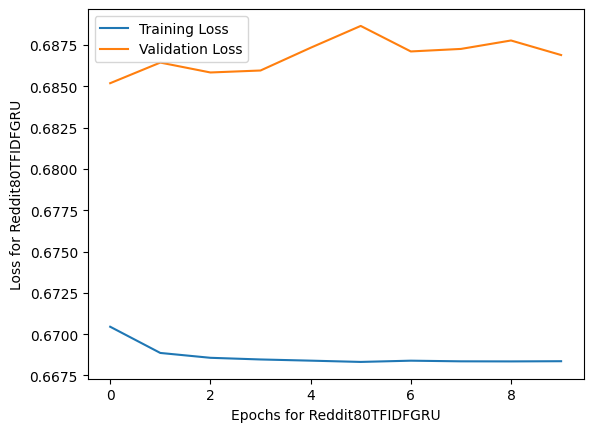

In [ ]:
plt.plot(historyreddit80tfidf.history['loss'], label='Training Loss')
plt.plot(historyreddit80tfidf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs for Reddit80TFIDFGRU')
plt.ylabel('Loss for Reddit80TFIDFGRU')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80tfidf = model_GRU.predict(X_test_grureddit80tfidf)
y_pred_binaryreddit80tfidf = np.round(y_predreddit80tfidf)

precisionreddit80tfidf = precision_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidf)
recallreddit80tfidf = recall_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidf)
f1reddit80tfidf = f1_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidf)
accuracyreddit80tfidf = accuracy_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidf)

print("Precision:", precisionreddit80tfidf)
print("Recall:", recallreddit80tfidf)
print("F1 Score:", f1reddit80tfidf)
print("Accuracy:", accuracyreddit80tfidf)

68/68 [==============================] - 1s 14ms/step
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.5685372585096596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


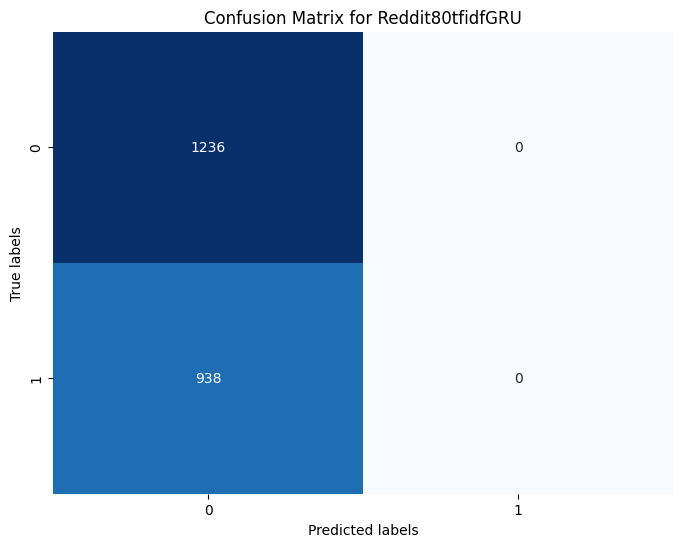

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80tfidf_cm = confusion_matrix(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80tfidf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80tfidfGRU")
plt.show()

For Bidirectional GRU evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80tfidfbigru = model_biGRU_LSTM.predict(X_test_grureddit80tfidf)
y_pred_binaryreddit80tfidfbigru = np.round(y_predreddit80tfidfbigru)

precisionreddit80tfidfbigru = precision_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidfbigru)
recallreddit80tfidfbigru = recall_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidfbigru)
f1reddit80tfidfbigru = f1_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidfbigru)
accuracyreddit80tfidfbigru = accuracy_score(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidfbigru)

print("Precision:", precisionreddit80tfidfbigru)
print("Recall:", recallreddit80tfidfbigru)
print("F1 Score:", f1reddit80tfidfbigru)
print("Accuracy:", accuracyreddit80tfidfbigru)

68/68 [==============================] - 5s 38ms/step
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.5685372585096596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


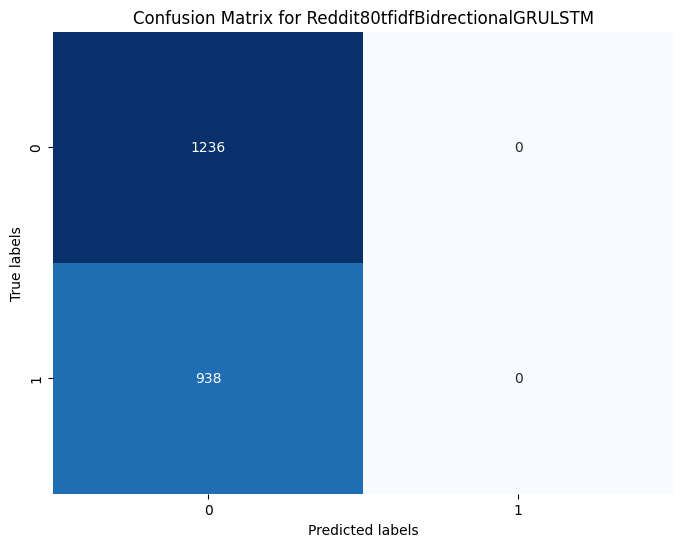

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80tfidfbigru_cm = confusion_matrix(y_testtwitter80_tfidf, y_pred_binaryreddit80tfidfbigru)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80tfidfbigru_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80tfidfBidrectionalGRULSTM")
plt.show()

GRU model for Reddit80Twitter20CountVectorizer

In [ ]:
#Reddit80CountVectorizer
historyreddit80cv = model_GRU.fit(X_train_grureddit80cv, y_trainreddit80_cv_smote, batch_size=64, epochs=10, validation_data=(X_test_grureddit80cv , y_testtwitter80_cv))

NameError: name 'model_GRU' is not defined

In [ ]:
historyreddit80cvbigru = model_biGRU_LSTM.fit(X_train_grureddit80cv, y_trainreddit80_cv_smote, batch_size=64, epochs=10, validation_data=(X_test_grureddit80cv , y_testtwitter80_cv))

Epoch 1/10
1610/1610 [==============================] - 133s 72ms/step - loss: 0.6710 - accuracy: 0.5885 - val_loss: 0.5958 - val_accuracy: 0.7314
Epoch 2/10
1610/1610 [==============================] - 116s 72ms/step - loss: 0.6389 - accuracy: 0.6546 - val_loss: 0.5543 - val_accuracy: 0.7815
Epoch 3/10
1610/1610 [==============================] - 166s 103ms/step - loss: 0.6327 - accuracy: 0.6654 - val_loss: 0.5423 - val_accuracy: 0.7764
Epoch 4/10
1610/1610 [==============================] - 163s 101ms/step - loss: 0.6276 - accuracy: 0.6708 - val_loss: 0.5386 - val_accuracy: 0.7764
Epoch 5/10
1610/1610 [==============================] - 134s 83ms/step - loss: 0.6166 - accuracy: 0.6817 - val_loss: 0.5115 - val_accuracy: 0.8059
Epoch 6/10
1610/1610 [==============================] - 104s 65ms/step - loss: 0.6006 - accuracy: 0.6938 - val_loss: 0.5117 - val_accuracy: 0.8086
Epoch 7/10
1610/1610 [==============================] - 101s 63ms/step - loss: 0.5987 - accuracy: 0.6962 - val_loss:

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80cv = model_GRU.predict(X_test_grureddit80cv)
y_pred_binaryreddit80cv = np.round(y_predreddit80cv)

precisionreddit80cv = precision_score(y_testtwitter80_cv, y_pred_binaryreddit80cv)
recallreddit80cv = recall_score(y_testtwitter80_cv, y_pred_binaryreddit80cv)
f1reddit80cv = f1_score(y_testtwitter80_cv, y_pred_binaryreddit80cv)
accuracyreddit80cv = accuracy_score(y_testtwitter80_cv, y_pred_binaryreddit80cv)

print("Precision:", precisionreddit80cv)
print("Recall:", recallreddit80cv)
print("F1 Score:", f1reddit80cv)
print("Accuracy:", accuracyreddit80cv)

68/68 [==============================] - 1s 14ms/step
Precision: 0.9163879598662207
Recall: 0.5842217484008528
F1 Score: 0.7135416666666666
Accuracy: 0.797608095676173


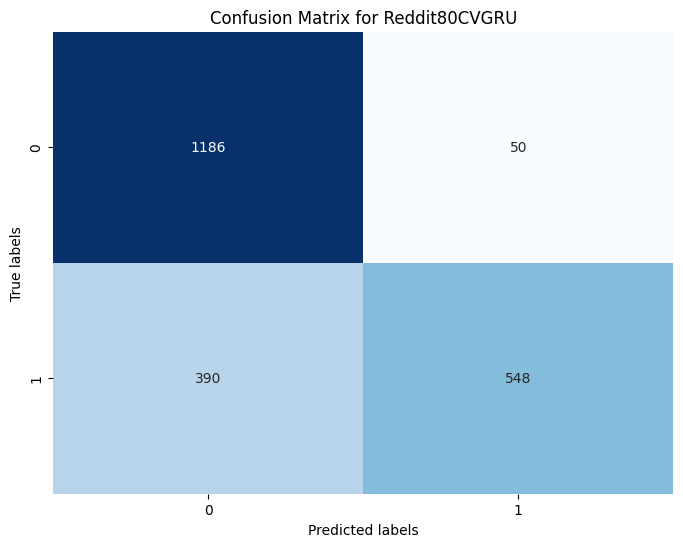

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80cv_cm = confusion_matrix(y_testtwitter80_cv, y_pred_binaryreddit80cv)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80cv_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80CVGRU")
plt.show()

#Reddit80BidirectionalGRULSTM


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predreddit80cvbigru =  model_biGRU_LSTM.predict(X_test_grureddit80cv)
y_pred_binaryreddit80cvbigru = np.round(y_predreddit80cvbigru)

precisionreddit80cvbigru = precision_score(y_testtwitter80_cv, y_pred_binaryreddit80cvbigru)
recallreddit80cvbigru = recall_score(y_testtwitter80_cv, y_pred_binaryreddit80cvbigru)
f1reddit80cvbigru = f1_score(y_testtwitter80_cv, y_pred_binaryreddit80cvbigru)
accuracyreddit80cvbigru = accuracy_score(y_testtwitter80_cv, y_pred_binaryreddit80cvbigru)

print("Precision:", precisionreddit80cvbigru)
print("Recall:", recallreddit80cvbigru)
print("F1 Score:", f1reddit80cvbigru)
print("Accuracy:", accuracyreddit80cvbigru)

68/68 [==============================] - 4s 58ms/step
Precision: 0.9330922242314648
Recall: 0.5501066098081023
F1 Score: 0.6921529175050302
Accuracy: 0.7888684452621895


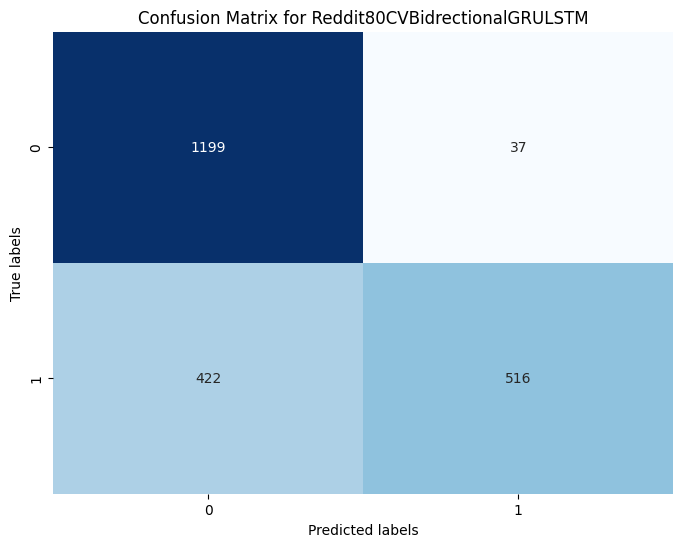

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reddit80cv_cmbigru = confusion_matrix(y_testtwitter80_cv, y_pred_binaryreddit80cvbigru)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit80cv_cmbigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80CVBidrectionalGRULSTM")
plt.show()

In [ ]:
model_GRU_twt = Sequential()
model_GRU_twt.add(Embedding(input_dim=len(X_train_grutwitter80tfidf), output_dim=100, input_length=256, name='layer_embedding'))
model_GRU_twt.add(GRU(16, return_sequences=True))
model_GRU_twt.add(GRU(8, return_sequences=True))
model_GRU_twt.add(GRU(4, return_sequences=True))
model_GRU_twt.add(GRU(2))
model_GRU_twt.add(Dropout(0.2))
model_GRU_twt.add(Dense(1, activation='sigmoid'))
model_GRU_twt.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU_twt.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding  (None, 256, 100)          514100    
 )                                                               
                                                                 
 gru (GRU)                   (None, 256, 16)           5664      
                                                                 
 gru_1 (GRU)                 (None, 256, 8)            624       
                                                                 
 gru_2 (GRU)                 (None, 256, 4)            168       
                                                                 
 gru_3 (GRU)                 (None, 2)                 48        
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                        

In [ ]:
historytwitter80tfidf = model_GRU_twt.fit(X_train_grutwitter80tfidf, y_train_twitter_tfidf_smote, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80tfidf, y_testreddit80_tfidf))

Epoch 1/10
81/81 [==============================] - 23s 175ms/step - loss: 0.4110 - accuracy: 0.9094 - val_loss: 0.9667 - val_accuracy: 0.5006
Epoch 2/10
81/81 [==============================] - 13s 156ms/step - loss: 0.3525 - accuracy: 0.9097 - val_loss: 1.0629 - val_accuracy: 0.5006
Epoch 3/10
81/81 [==============================] - 13s 157ms/step - loss: 0.3375 - accuracy: 0.9097 - val_loss: 1.1227 - val_accuracy: 0.5006
Epoch 4/10
81/81 [==============================] - 13s 160ms/step - loss: 0.3314 - accuracy: 0.9097 - val_loss: 1.1636 - val_accuracy: 0.5006
Epoch 5/10
81/81 [==============================] - 13s 160ms/step - loss: 0.3322 - accuracy: 0.9097 - val_loss: 1.1925 - val_accuracy: 0.5006
Epoch 6/10
81/81 [==============================] - 13s 160ms/step - loss: 0.3325 - accuracy: 0.9097 - val_loss: 1.2053 - val_accuracy: 0.5006
Epoch 7/10
81/81 [==============================] - 12s 154ms/step - loss: 0.3321 - accuracy: 0.9097 - val_loss: 1.2142 - val_accuracy: 0.5006

In [ ]:
historytwitter80tfidfbigru = model_biGRU_LSTM.fit(X_train_grutwitter80tfidf, y_train_twitter_tfidf_smote, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80tfidf, y_testreddit80_tfidf))

Epoch 1/10
81/81 [==============================] - 26s 324ms/step - loss: 0.3822 - accuracy: 0.8306 - val_loss: 1.1925 - val_accuracy: 0.5006
Epoch 2/10
81/81 [==============================] - 27s 335ms/step - loss: 0.3291 - accuracy: 0.9096 - val_loss: 1.2145 - val_accuracy: 0.5006
Epoch 3/10
81/81 [==============================] - 25s 316ms/step - loss: 0.3263 - accuracy: 0.9109 - val_loss: 1.3413 - val_accuracy: 0.5006
Epoch 4/10
81/81 [==============================] - 25s 316ms/step - loss: 0.3232 - accuracy: 0.9125 - val_loss: 1.1661 - val_accuracy: 0.5006
Epoch 5/10
81/81 [==============================] - 26s 321ms/step - loss: 0.3187 - accuracy: 0.9125 - val_loss: 1.1903 - val_accuracy: 0.5006
Epoch 6/10
81/81 [==============================] - 25s 317ms/step - loss: 0.3177 - accuracy: 0.9125 - val_loss: 1.2263 - val_accuracy: 0.5006
Epoch 7/10
81/81 [==============================] - 23s 291ms/step - loss: 0.3100 - accuracy: 0.9125 - val_loss: 1.2197 - val_accuracy: 0.5006

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80tfidf = model_GRU_twt.predict(X_test_grutwitter80tfidf)
y_pred_binarytwitter80tfidf = np.round(y_predtwitter80tfidf)

precisiontwitter80tfidf = precision_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidf)
recalltwitter80tfidf = recall_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidf)
f1twitter80tfidf = f1_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidf)
accuracytwitter80tfidf = accuracy_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidf)

print("Precision:", precisiontwitter80tfidf)
print("Recall:", recalltwitter80tfidf)
print("F1 Score:", f1twitter80tfidf)
print("Accuracy:", accuracytwitter80tfidf)

1450/1450 [==============================] - 24s 17ms/step
Precision: 0.5005711822394655
Recall: 1.0
F1 Score: 0.667174190953619
Accuracy: 0.5005711822394655


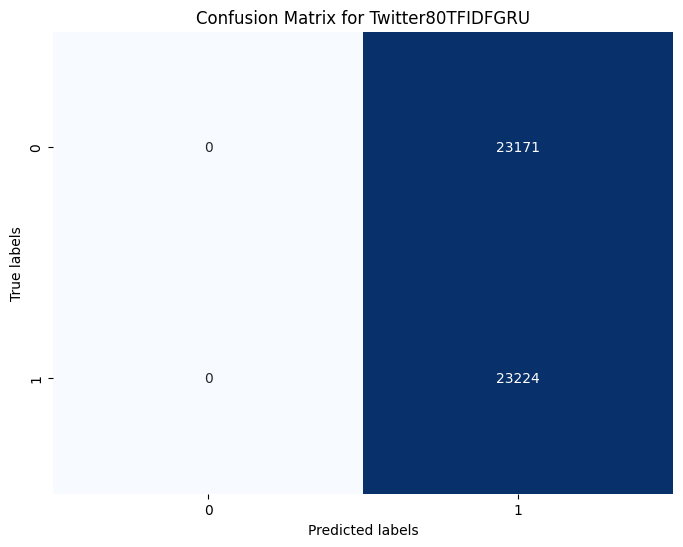

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80tfidf_cm = confusion_matrix(y_testreddit80_tfidf, y_pred_binarytwitter80tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80tfidf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80TFIDFGRU")
plt.show()

Twitter80TFIDFBidirectionalGRU evaluation

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80tfidfbigru = model_biGRU_LSTM.predict(X_test_grutwitter80tfidf)
y_pred_binarytwitter80tfidfbigru = np.round(y_predtwitter80tfidfbigru)

precisiontwitter80tfidfbigru = precision_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidfbigru)
recalltwitter80tfidfbigru = recall_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidfbigru)
f1twitter80tfidfbigru = f1_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidfbigru)
accuracytwitter80tfidfbigru = accuracy_score(y_testreddit80_tfidf, y_pred_binarytwitter80tfidfbigru)

print("Precision:", precisiontwitter80tfidfbigru)
print("Recall:", recalltwitter80tfidfbigru)
print("F1 Score:", f1twitter80tfidfbigru)
print("Accuracy:", accuracytwitter80tfidfbigru)

1450/1450 [==============================] - 45s 31ms/step
Precision: 0.5005711822394655
Recall: 1.0
F1 Score: 0.667174190953619
Accuracy: 0.5005711822394655


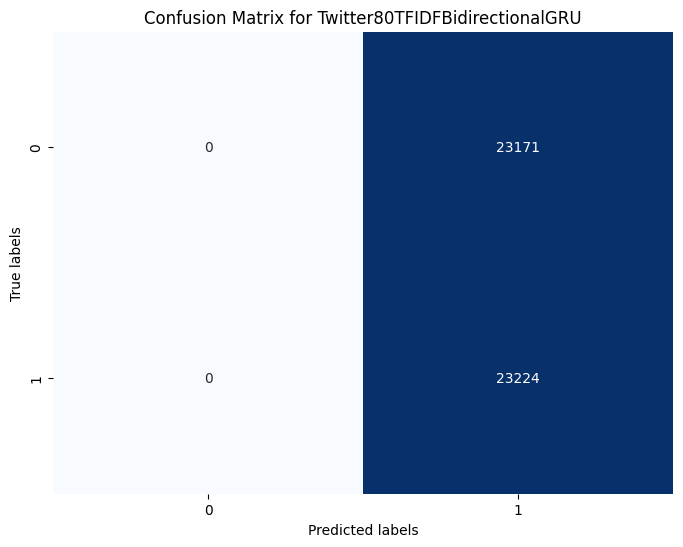

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80tfidf_cmbigru = confusion_matrix(y_testreddit80_tfidf, y_pred_binarytwitter80tfidfbigru)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80tfidf_cmbigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80TFIDFBidirectionalGRU")
plt.show()

In [ ]:
historytwitter80cv = model_GRU_twt.fit(X_train_grutwitter80cv, y_train_twitter_cv_smote, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80cv, y_testreddit80_cv))

Epoch 1/10
68/68 [==============================] - 12s 182ms/step - loss: 0.4887 - accuracy: 0.8225 - val_loss: 0.9599 - val_accuracy: 0.5006
Epoch 2/10
68/68 [==============================] - 12s 185ms/step - loss: 0.4794 - accuracy: 0.8225 - val_loss: 0.9204 - val_accuracy: 0.5006
Epoch 3/10
68/68 [==============================] - 12s 184ms/step - loss: 0.4800 - accuracy: 0.8225 - val_loss: 0.9765 - val_accuracy: 0.5006
Epoch 4/10
68/68 [==============================] - 12s 185ms/step - loss: 0.4785 - accuracy: 0.8225 - val_loss: 0.8929 - val_accuracy: 0.5006
Epoch 5/10
68/68 [==============================] - 12s 185ms/step - loss: 0.4754 - accuracy: 0.8225 - val_loss: 0.9328 - val_accuracy: 0.5006
Epoch 6/10
68/68 [==============================] - 12s 185ms/step - loss: 0.4761 - accuracy: 0.8225 - val_loss: 0.8793 - val_accuracy: 0.5006
Epoch 7/10
68/68 [==============================] - 12s 185ms/step - loss: 0.4780 - accuracy: 0.8225 - val_loss: 0.9604 - val_accuracy: 0.5006

In [ ]:
historytwitter80cvbigru = model_biGRU_LSTM.fit(X_train_grutwitter80cv, y_train_twitter_cv_smote, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80cv, y_testreddit80_cv))

Epoch 1/10
71/71 [==============================] - 26s 366ms/step - loss: 0.5331 - accuracy: 0.7832 - val_loss: 0.8660 - val_accuracy: 0.5049
Epoch 2/10
71/71 [==============================] - 26s 364ms/step - loss: 0.5305 - accuracy: 0.7832 - val_loss: 0.8789 - val_accuracy: 0.5049
Epoch 3/10
71/71 [==============================] - 26s 365ms/step - loss: 0.5285 - accuracy: 0.7832 - val_loss: 0.9248 - val_accuracy: 0.5050
Epoch 4/10
71/71 [==============================] - 22s 318ms/step - loss: 0.5309 - accuracy: 0.7832 - val_loss: 0.8810 - val_accuracy: 0.5049
Epoch 5/10
71/71 [==============================] - 25s 353ms/step - loss: 0.5272 - accuracy: 0.7832 - val_loss: 0.8665 - val_accuracy: 0.5049
Epoch 6/10
71/71 [==============================] - 23s 323ms/step - loss: 0.5290 - accuracy: 0.7832 - val_loss: 0.8625 - val_accuracy: 0.5058
Epoch 7/10
71/71 [==============================] - 25s 353ms/step - loss: 0.5268 - accuracy: 0.7832 - val_loss: 0.8714 - val_accuracy: 0.5047

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80cv = model_GRU_twt.predict(X_test_grutwitter80cv)
y_pred_binarytwitter80cv = np.round(y_predtwitter80cv)

precisiontwitter80cv = precision_score(y_testreddit80_cv, y_pred_binarytwitter80cv)
recalltwitter80cv = recall_score(y_testreddit80_cv, y_pred_binarytwitter80cv)
f1twitter80cv = f1_score(y_testreddit80_cv, y_pred_binarytwitter80cv)
accuracytwitter80cv = accuracy_score(y_testreddit80_cv, y_pred_binarytwitter80cv)

print("Precision:", precisiontwitter80cv)
print("Recall:", recalltwitter80cv)
print("F1 Score:", f1twitter80cv)
print("Accuracy:", accuracytwitter80cv)

1450/1450 [==============================] - 24s 17ms/step
Precision: 0.5005711822394655
Recall: 1.0
F1 Score: 0.667174190953619
Accuracy: 0.5005711822394655


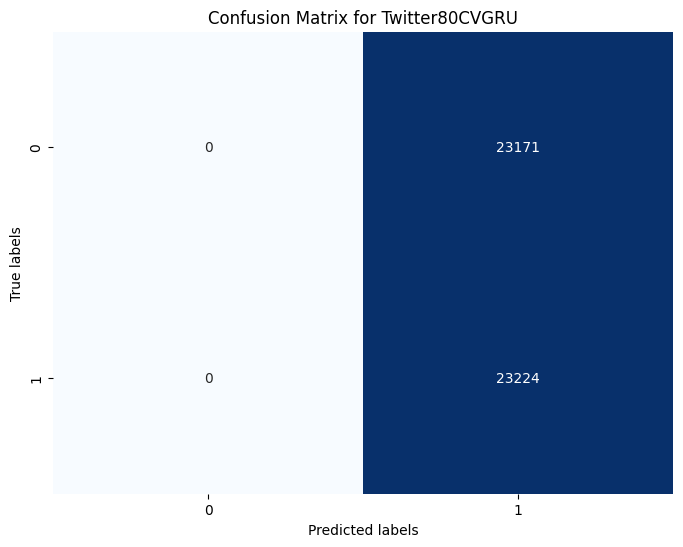

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80cv_cm = confusion_matrix(y_testreddit80_cv, y_pred_binarytwitter80cv)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80cv_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80CVGRU")
plt.show()

#Bidirectional GRU evaulation Twitter80CV

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predtwitter80cvbigru = model_biGRU_LSTM.predict(X_test_grutwitter80cv)
y_pred_binarytwitter80cvbigru = np.round(y_predtwitter80cvbigru)

precisiontwitter80cvbigru = precision_score(y_testreddit80_cv, y_pred_binarytwitter80cvbigru)
recalltwitter80cvbigru = recall_score(y_testreddit80_cv, y_pred_binarytwitter80cvbigru)
f1twitter80cvbigru = f1_score(y_testreddit80_cv, y_pred_binarytwitter80cvbigru)
accuracytwitter80cvbigru = accuracy_score(y_testreddit80_cv, y_pred_binarytwitter80cvbigru)

print("Precision:", precisiontwitter80cvbigru)
print("Recall:", recalltwitter80cvbigru)
print("F1 Score:", f1twitter80cvbigru)
print("Accuracy:", accuracytwitter80cvbigru)

1450/1450 [==============================] - 42s 29ms/step
Precision: 0.502106314600886
Recall: 0.9956510506372718
F1 Score: 0.6675616375079393
Accuracy: 0.5036103028343571


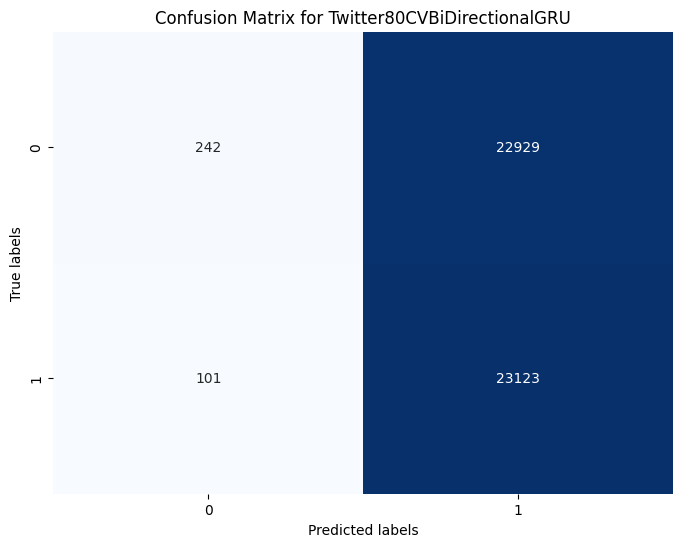

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
twitter80cv_bigru = confusion_matrix(y_testreddit80_cv, y_pred_binarytwitter80cvbigru)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter80cv_bigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80CVBiDirectionalGRU")
plt.show()

1. Reddit80-Twitter20

Refer to this for your training
- X_train: X_trainreddit80_tfidf_lsa
- y_train: y_trainreddit80_tfidf
- X_test: X_test_twitter80_tfidf
- y_test: y_testtwitter80_tfidf


Metrics for Random Forest:
Accuracy: 0.5114995400183993
Precision: 0.4621489621489622
Recall: 0.8070362473347548
F1-score: 0.8070362473347548


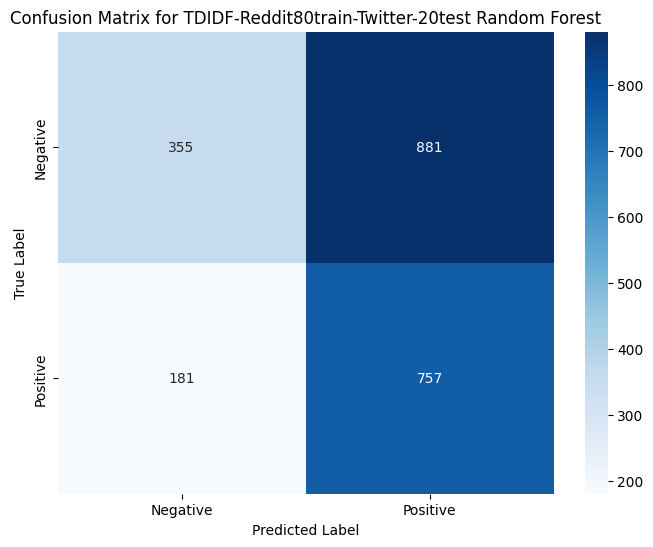


Metrics for Logistic Regression:
Accuracy: 0.7217111315547378
Precision: 0.6575212866603595
Recall: 0.7409381663113006
F1-score: 0.7409381663113006


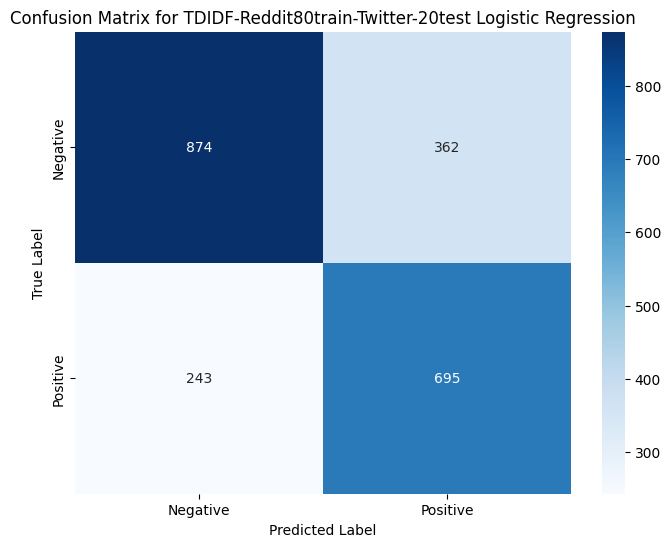


Metrics for SVM:
Accuracy: 0.6904323827046918
Precision: 0.6210045662100456
Recall: 0.7249466950959488
F1-score: 0.7249466950959488


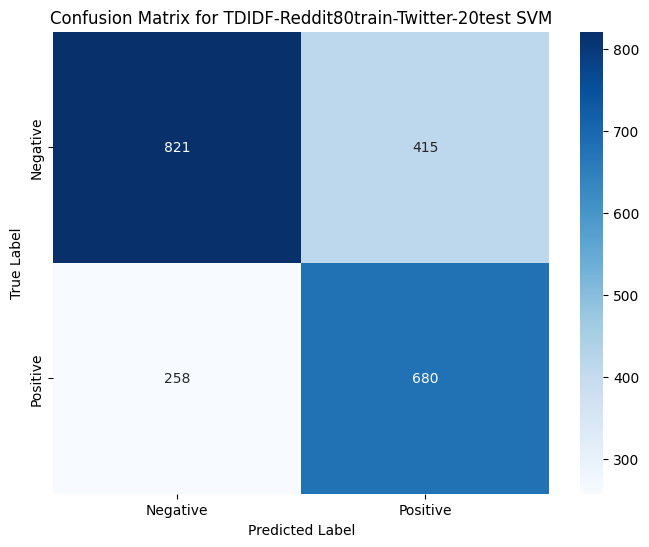


Metrics for Decision Tree:
Accuracy: 0.5059797608095676
Precision: 0.4573400250941029
Recall: 0.7771855010660981
F1-score: 0.7771855010660981


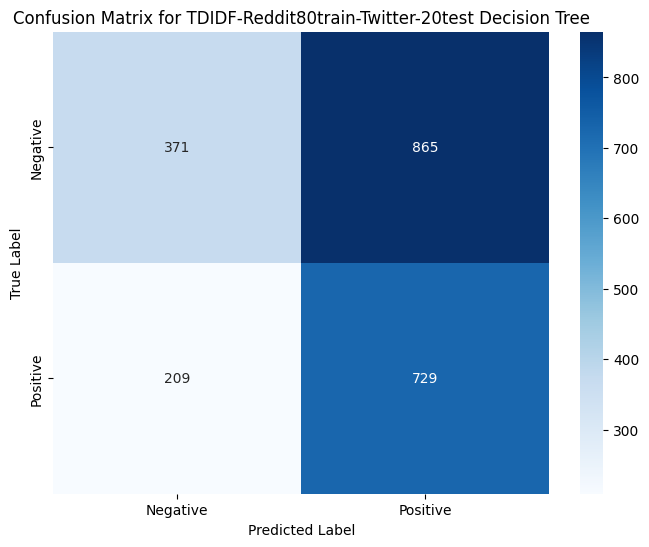


Metrics for KNN:
Accuracy: 0.7511499540018399
Precision: 0.7561290322580645
Recall: 0.6247334754797441
F1-score: 0.6247334754797441


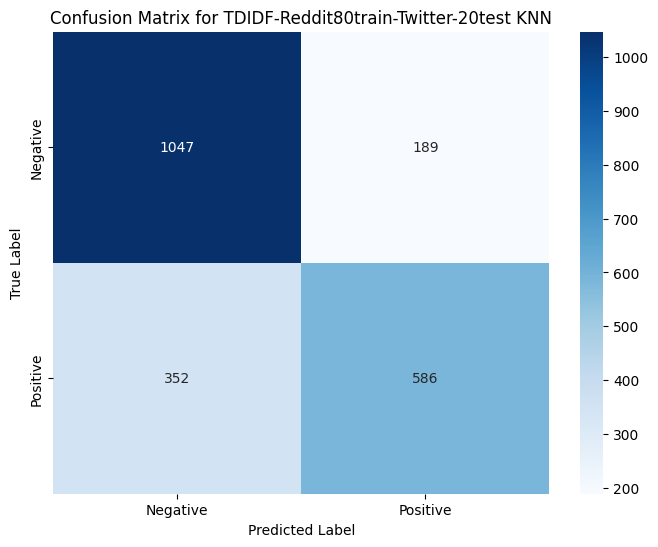


Metrics for XGBoost:
Accuracy: 0.5
Precision: 0.45573380867498514
Recall: 0.8176972281449894
F1-score: 0.8176972281449894


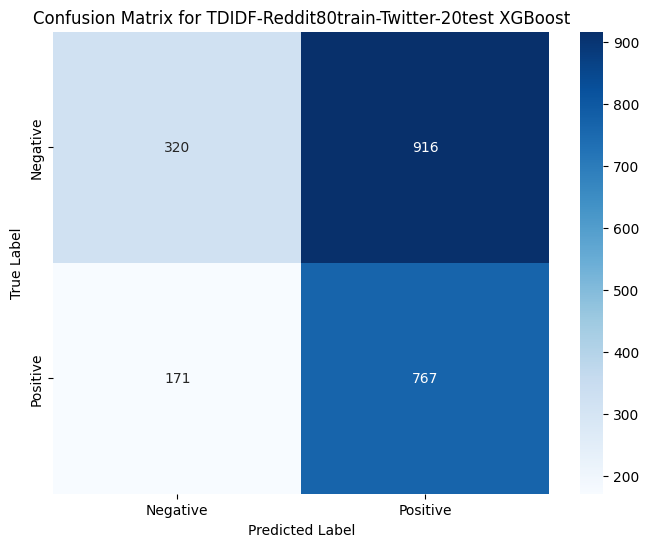

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:


classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)
    reddittrain80predictionstfidf = clf.predict(X_test_twitter80_tfidf)

    with open(f'{clf_name.lower().replace(" ", "_")}_modeltfidfreddit.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracyreddittrain80tfidf = accuracy_score(y_testtwitter80_tfidf, reddittrain80predictionstfidf)
    precisionreddittrain80tfidf = precision_score(y_testtwitter80_tfidf, reddittrain80predictionstfidf)
    recallreddittrain80tfidf = recall_score(y_testtwitter80_tfidf, reddittrain80predictionstfidf)
    f1reddittrain80tfidf = f1_score(y_testtwitter80_tfidf, reddittrain80predictionstfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracyreddittrain80tfidf)
    print("Precision:", precisionreddittrain80tfidf)
    print("Recall:", recallreddittrain80tfidf)
    print("F1-score:", recallreddittrain80tfidf)

    # Confusion matrix
    conf_matrixreddittrain80tfidf = confusion_matrix(y_testtwitter80_tfidf, reddittrain80predictionstfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixreddittrain80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for TDIDF-Reddit80train-Twitter-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


2. Twitter80-Reddit20-TFIDF
- X_train: X_train_twitter_tfidf_smote_lsa
- y_train: y_train_twitter_tfidf_smote
- X_test: X_testreddit80_tfidf_lsa
- y_test: y_testreddit80_tfidf


Metrics for Random Forest:
Accuracy: 0.5321909688544024
Precision: 0.5172054695282079
Recall: 0.9837237340682053
F1-score: 0.6779630838625438


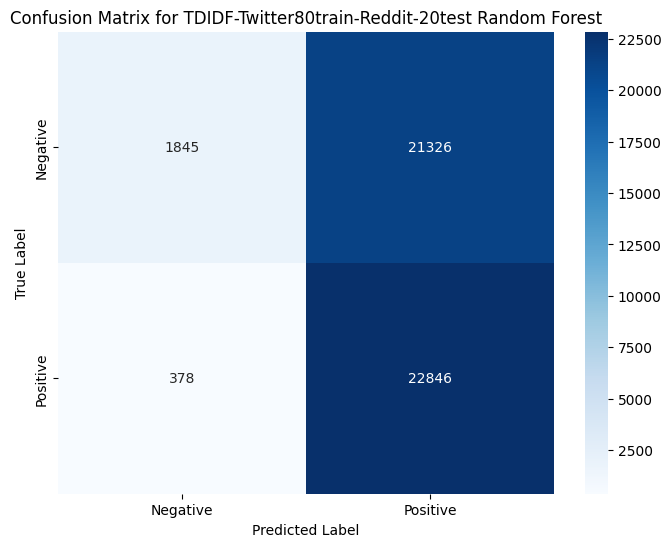


Metrics for Logistic Regression:
Accuracy: 0.5131587455544778
Precision: 0.5069543003122339
Recall: 0.9997416465725112
F1-score: 0.6727612534952118


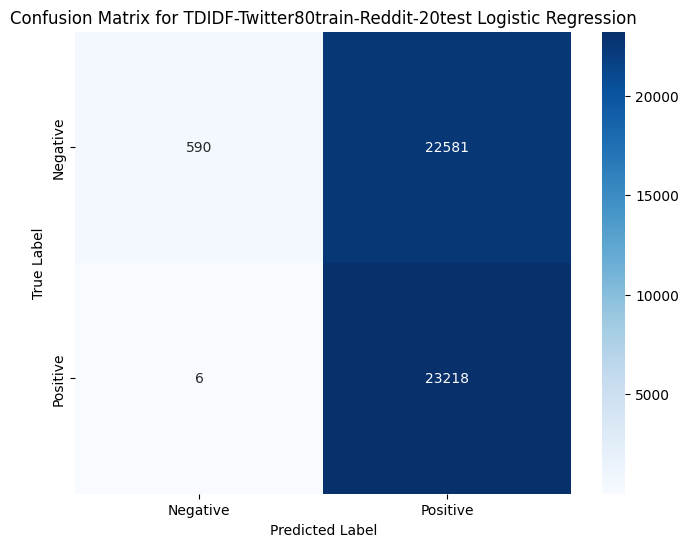


Metrics for SVM:
Accuracy: 0.5149908395301218
Precision: 0.5079007266042196
Recall: 0.999267998622115
F1-score: 0.673486563352487


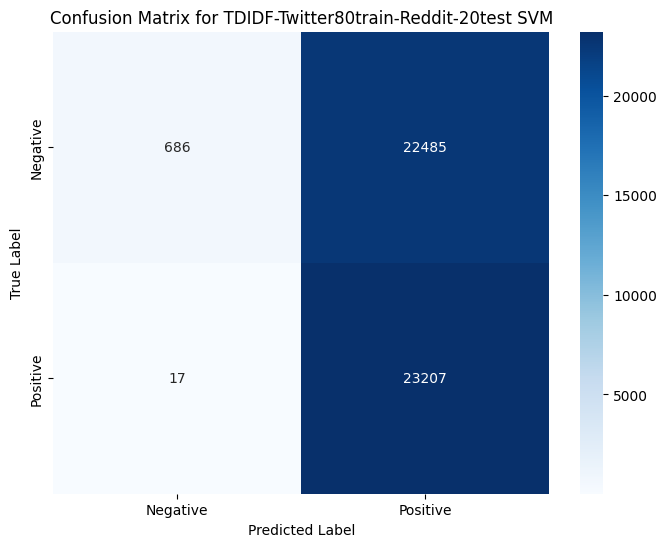


Metrics for Decision Tree:
Accuracy: 0.5671731867658153
Precision: 0.538242523057455
Recall: 0.952376851532897
F1-score: 0.6877808355489218


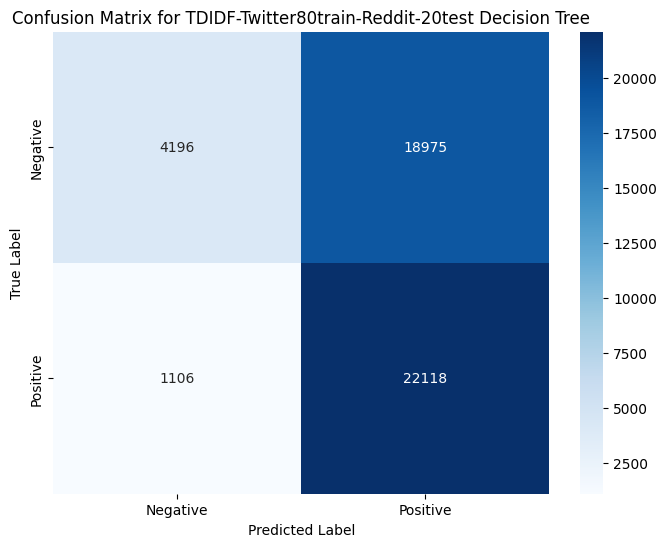


Metrics for KNN:
Accuracy: 0.6235585731221037
Precision: 0.5781559590695654
Recall: 0.9171977264898381
F1-score: 0.7092413471623352


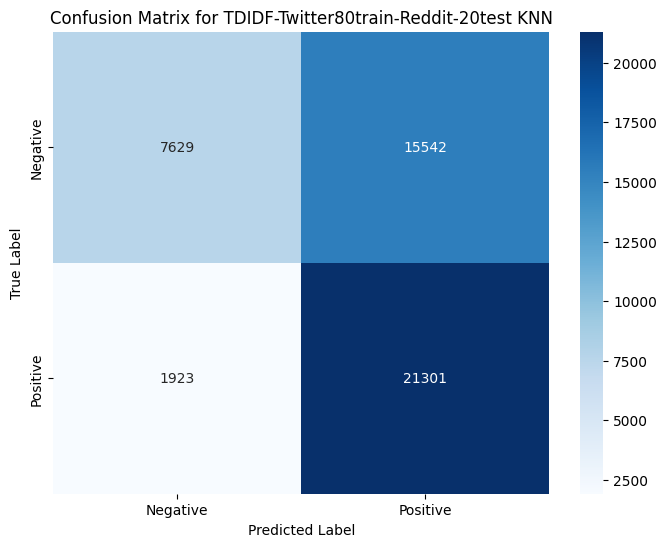


Metrics for XGBoost:
Accuracy: 0.5253583360275892
Precision: 0.5135616531012558
Recall: 0.9807957285566655
F1-score: 0.6741346907971648


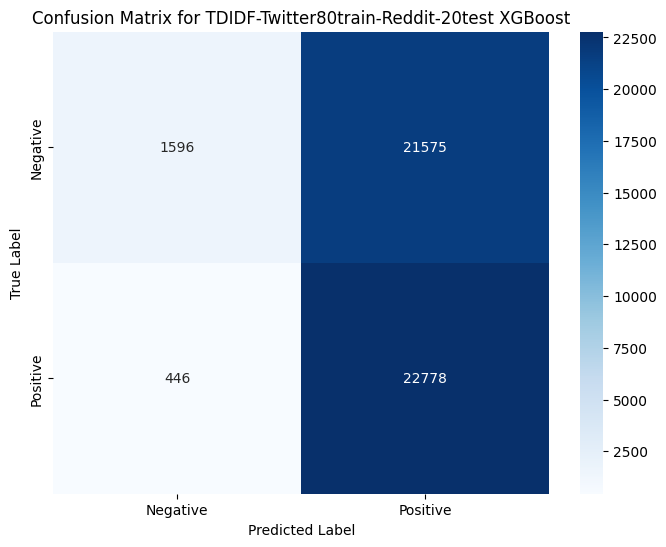

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_tfidf_smote_lsa, y_train_twitter_tfidf_smote)
    twittertrain80predictionstfidf = clf.predict(X_testreddit80_tfidf_lsa)

    with open(f'{clf_name.lower().replace(" ", "_")}_tfidftwitter_model.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracytwittertrain80tfidf = accuracy_score(y_testreddit80_tfidf, twittertrain80predictionstfidf)
    precisiontwittertrain80tfidf = precision_score(y_testreddit80_tfidf, twittertrain80predictionstfidf)
    recalltwittertrain80tfidf = recall_score(y_testreddit80_tfidf,twittertrain80predictionstfidf)
    f1twittertrain80tfidf = f1_score(y_testreddit80_tfidf, twittertrain80predictionstfidf)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:",  accuracytwittertrain80tfidf)
    print("Precision:",  precisiontwittertrain80tfidf)
    print("Recall:", recalltwittertrain80tfidf)
    print("F1-score:", f1twittertrain80tfidf)

    # Confusion matrix
    conf_matrixtwitter80tfidf = confusion_matrix(y_testreddit80_tfidf, twittertrain80predictionstfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrixtwitter80tfidf, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for TDIDF-Twitter80train-Reddit-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


3. Reddit80_Twitter20_CountVectorizer
- X_train: X_trainreddit80_cv_lsa
- y_train: y_trainreddit80_cv
- X_test: X_test_twitter80_cv
- y_test: y_testtwitter80_cv


Metrics for Random Forest:
Accuracy: 0.6168353265869365
Precision: 0.6356589147286822
Recall: 0.2622601279317697
F1-score: 0.3713207547169811


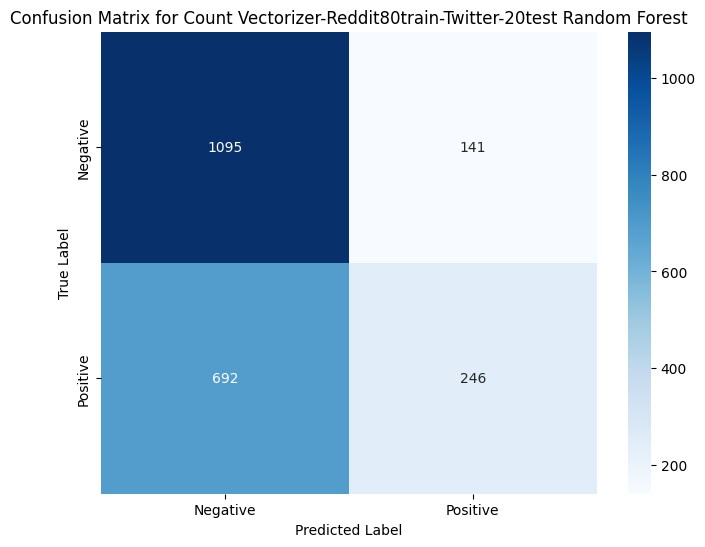

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Metrics for Logistic Regression:
Accuracy: 0.6002759889604415
Precision: 0.5711340206185567
Recall: 0.2953091684434968
F1-score: 0.38931834153197475


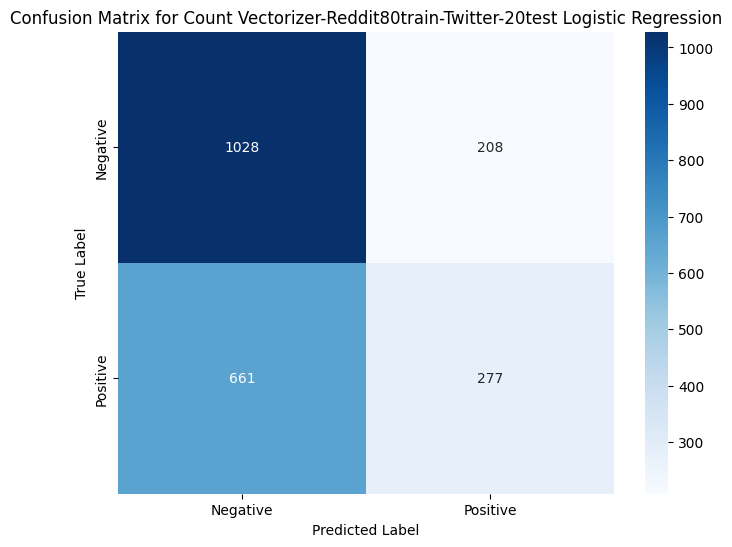


Metrics for SVM:
Accuracy: 0.6218951241950322
Precision: 0.732
Recall: 0.19509594882729211
F1-score: 0.30808080808080807


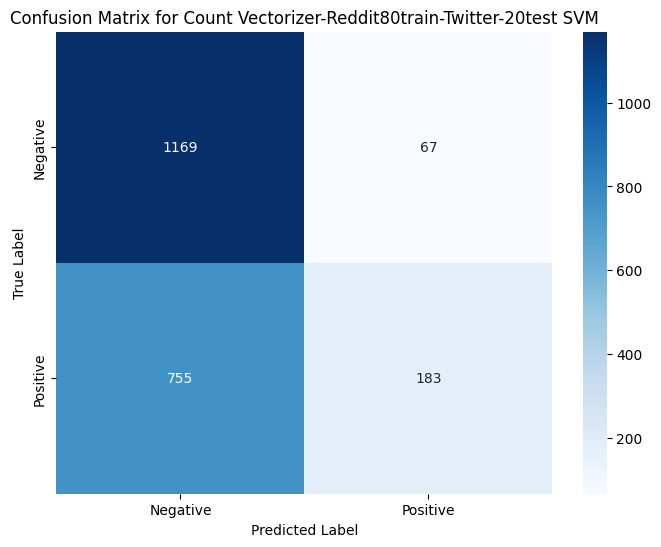


Metrics for Decision Tree:
Accuracy: 0.5239190432382704
Precision: 0.4485683987274655
Recall: 0.4509594882729211
F1-score: 0.4497607655502392


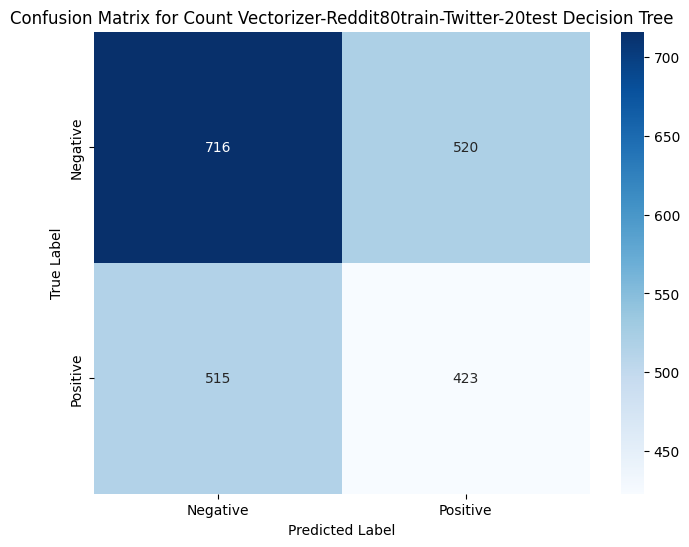


Metrics for KNN:
Accuracy: 0.5119595216191353
Precision: 0.18134715025906736
Recall: 0.03731343283582089
F1-score: 0.06189213085764809


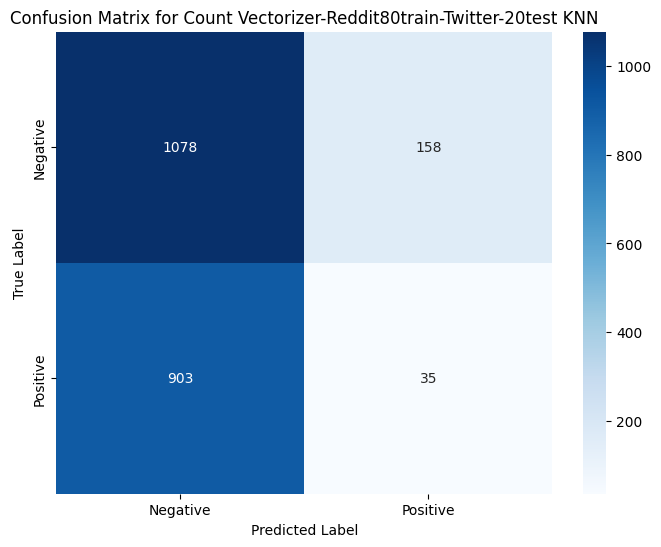


Metrics for XGBoost:
Accuracy: 0.5818767249310027
Precision: 0.6705882352941176
Recall: 0.060767590618336885
F1-score: 0.11143695014662756


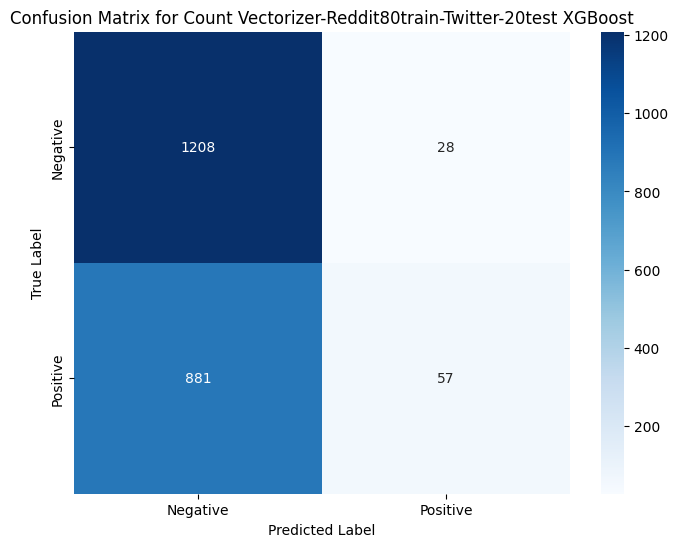

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_trainreddit80_cv_lsa_smote, y_trainreddit80_cv_smote)
    reddittrain80predictionscount = clf.predict(X_test_twitter80_cv)

    with open(f'{clf_name.lower().replace(" ", "_")}_reddit80twitter20countvectorizermodel.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracyreddittrain80count = accuracy_score(y_testtwitter80_cv, reddittrain80predictionscount)
    precisionreddittrain80count = precision_score(y_testtwitter80_cv, reddittrain80predictionscount)
    recallreddittrain80count = recall_score(y_testtwitter80_cv, reddittrain80predictionscount)
    f1reddittrain80count = f1_score(y_testtwitter80_cv, reddittrain80predictionscount)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracyreddittrain80count)
    print("Precision:", precisionreddittrain80count)
    print("Recall:", recallreddittrain80count)
    print("F1-score:", f1reddittrain80count)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testtwitter80_cv,  reddittrain80predictionscount)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for Count Vectorizer-Reddit80train-Twitter-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

4. Twitter80Reddit20CountVectorizer
- X_train: X_train_twitter_cv_smote_lsa
- y_train: y_train_twitter_cv_smote
- X_test: X_testreddit80_cv_lsa
- y_test: y_testreddit80_cv


Metrics for Random Forest:
Accuracy: 0.4749865287207673
Precision: 0.4869846662381783
Recall: 0.9134946606958319
F1-score: 0.6352937653470684


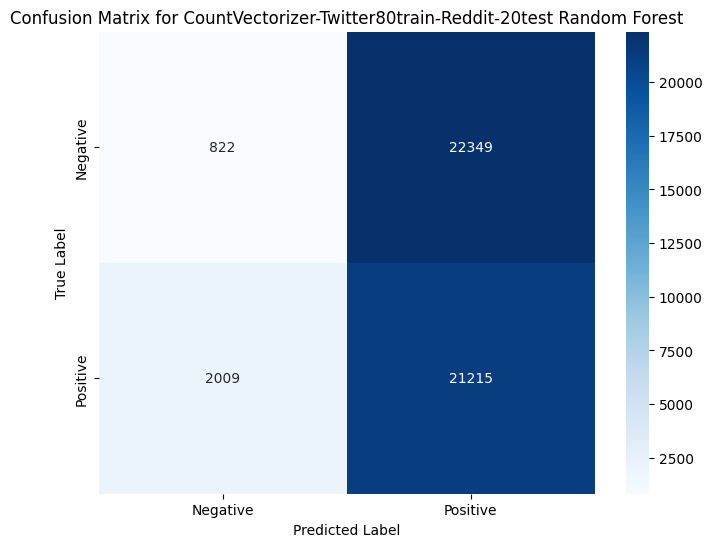


Metrics for Logistic Regression:
Accuracy: 0.4455221467830585
Precision: 0.30046274134354556
Recall: 0.0810799173269032
F1-score: 0.12769997626394491


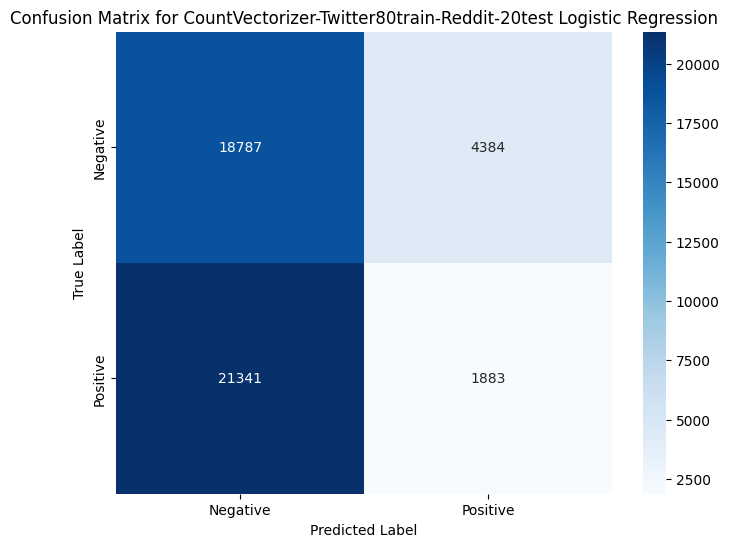


Metrics for SVM:
Accuracy: 0.5757516973811834
Precision: 0.5475391348709825
Recall: 0.8780571822252842
F1-score: 0.6744836026262259


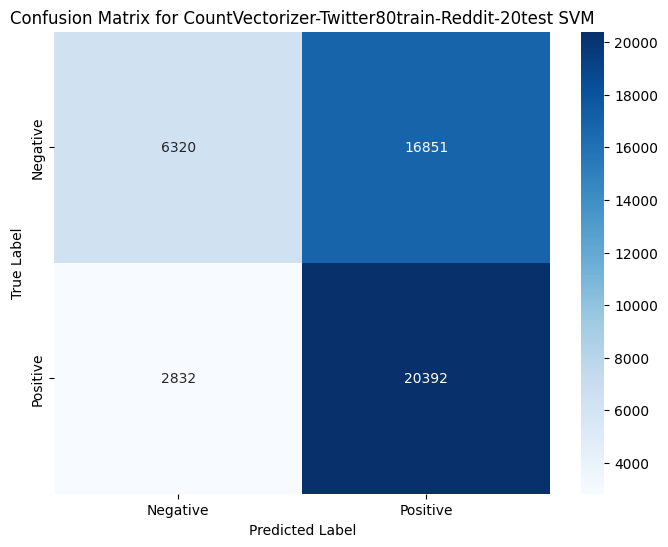


Metrics for Decision Tree:
Accuracy: 0.3848475051190861
Precision: 0.3578001283971753
Recall: 0.2879779538408543
F1-score: 0.3191144193148201


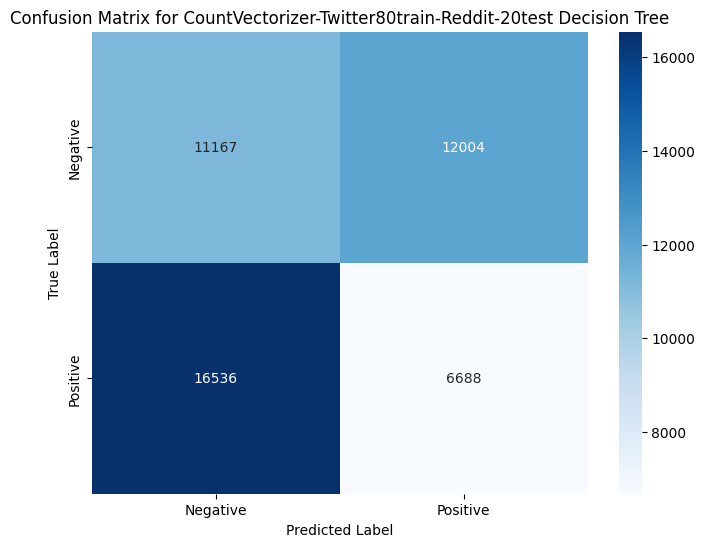


Metrics for KNN:
Accuracy: 0.3817868304774221
Precision: 0.32043689959205157
Recall: 0.20969686531174647
F1-score: 0.2535005986153766


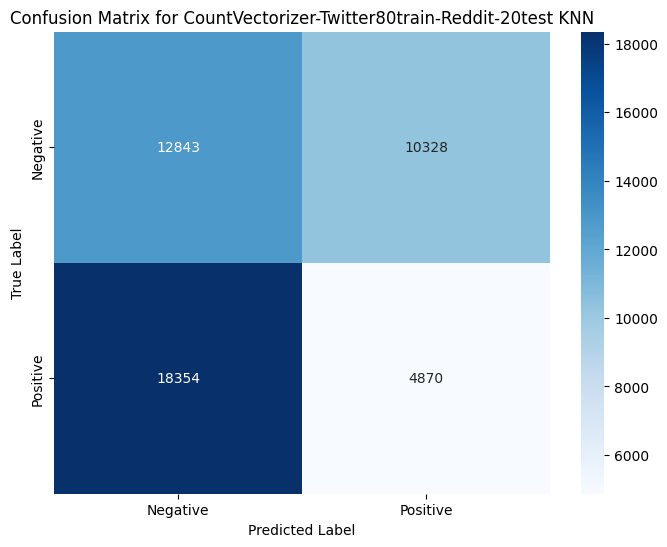


Metrics for XGBoost:
Accuracy: 0.5272550921435499
Precision: 0.5156072438888755
Recall: 0.9182311401997933
F1-score: 0.6603905052413174


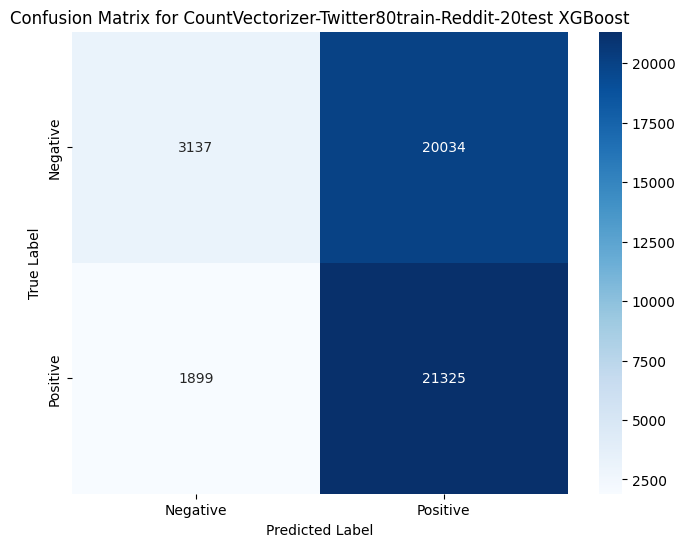

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}


for clf_name, clf in classifiers.items():
    clf.fit(X_train_twitter_cv_smote_lsa, y_train_twitter_cv_smote)
    twittertrain80predictionscv = clf.predict(X_testreddit80_cv_lsa)

    with open(f'{clf_name.lower().replace(" ", "_")}_cvtwitter80_model.pkl', 'wb') as file:
        pickle.dump(clf, file)

    accuracytwittertrain80predictionscv = accuracy_score(y_testreddit80_cv,  twittertrain80predictionscv)
    precisiontwittertrain80predictionscv = precision_score(y_testreddit80_cv, twittertrain80predictionscv)
    recalltwittertrain80predictionscv = recall_score(y_testreddit80_cv, twittertrain80predictionscv)
    f1twittertrain80predictionscv = f1_score(y_testreddit80_cv, twittertrain80predictionscv)

    print(f"\nMetrics for {clf_name}:")
    print("Accuracy:", accuracytwittertrain80predictionscv)
    print("Precision:", precisiontwittertrain80predictionscv)
    print("Recall:", recalltwittertrain80predictionscv)
    print("F1-score:", f1twittertrain80predictionscv)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_testreddit80_cv,  twittertrain80predictionscv)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for CountVectorizer-Twitter80train-Reddit-20test {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#Grid Search and K-Fold Validation

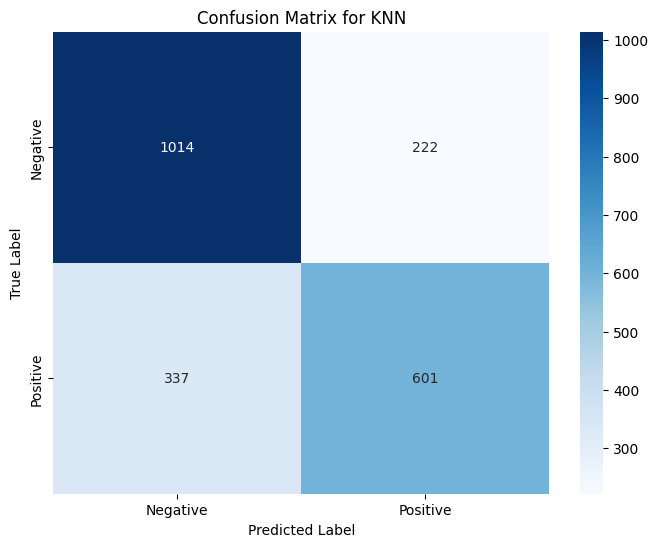

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7428702851885924
Precision: 0.7302551640340219
Recall: 0.6407249466950959
F1-score: 0.6825667234525838


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_trainreddit80_tfidf_lsa_smotee, y_trainreddit80_tfidf_smote)

best_knn = grid_search.best_estimator_
y_predknngs = best_knn.predict(X_test_twitter80_tfidf)

accuracyknngs = accuracy_score(y_testtwitter80_tfidf, y_predknngs)
precisionknngs = precision_score(y_testtwitter80_tfidf, y_predknngs)
recallknngs = recall_score(y_testtwitter80_tfidf, y_predknngs)
f1knngs = f1_score(y_testtwitter80_tfidf, y_predknngs)
conf_matrixgridsearchknn = confusion_matrix(y_testtwitter80_tfidf, y_predknngs)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixgridsearchknn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracyknngs)
print("Precision:", precisionknngs)
print("Recall:", recallknngs)
print("F1-score:", f1knngs)

Feature Engineering
1. Bag of Words
2. TF-IDF
3. Latent Semantic Indexing
4. N-grams
5. Latent Dirichlet Allocation

Machine Learning

1. Random Forest
2. SVM
3. Naive Bayes
4. Decision Tree
5. Logistic Regression

Deep Learning
1. BERT
2. LSTM
3. GRU